In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from biopsykit.utils.dataframe_handling import multi_xs

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from fau_colors import register_cmaps

register_cmaps()

sns.set_theme(context="talk", style="white", palette="faculties_light", font_scale=1.2)

%matplotlib widget

In [5]:
df = pd.read_pickle("full_df.pkl")

# 5 stage

In [6]:
df_5 = multi_xs(df, ["5stage"], level="stage")
df_5 = multi_xs(df_5, ["accuracy", "f1", "mcc"], level="metric")[["data"]].astype(float)

In [7]:
df_5_mean = df_5.groupby(level=["algorithm type", "algorithm", "modality", "stage", "metric"]).agg(["median"])
df_5_mean.unstack("modality")["data"]["median"][["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + EDR"]]

modality                                            ACT  ACT + HRV  \
algorithm type algorithm     stage  metric                           
DL             LSTM          5stage accuracy  56.064064  64.863512   
                                    f1        46.474999  59.634345   
                                    mcc        0.366766   0.503365   
               TCN           5stage accuracy  56.095168  61.357522   
                                    f1        46.812509  55.297366   
                                    mcc        0.365635   0.441272   
ML             AdaBoost      5stage accuracy  55.030840  56.398492   
                                    f1        45.917285  48.695328   
                                    mcc        0.331769   0.356138   
               MLP           5stage accuracy  54.909843  56.769469   
                                    f1        46.228365  48.639858   
                                    mcc        0.342308   0.364317   
               Random Forest 5stage accuracy  55.086120  56.889172   
                                    f1        45.620917  48.487281   
                                    mcc        0.335515   0.363262   
               SVM           5stage accuracy  54.971204  56.268405   
                                    f1        45.775717  46.993729   
                                    mcc        0.334181   0.347817   
               XGBoost       5stage accuracy  55.200535  57.246912   
                                    f1        45.872163  49.273496   
                                    mcc        0.342714   0.371629   

modality                                      ACT + HRV + RRV  ACT + HRV + EDR  
algorithm type algorithm     stage  metric                                      
DL             LSTM          5stage accuracy        65.743149        63.678065  
                                    f1              60.082548        57.235085  
                                    mcc              0.513862         0.485605  
               TCN           5stage accuracy        62.374225        62.037776  
                                    f1              57.904158        56.595431  
                                    mcc              0.455434         0.456553  
ML             AdaBoost      5stage accuracy        61.873434        57.226249  
                                    f1              56.739394        50.493629  
                                    mcc              0.444247         0.373156  
               MLP           5stage accuracy        62.739100        57.883309  
                                    f1              56.631437        50.893497  
                                    mcc              0.459093         0.376277  
               Random Forest 5stage accuracy        62.307365        57.460926  
                                    f1              55.730187        50.020616  
                                    mcc              0.445968         0.381813  
               SVM           5stage accuracy        60.547127        56.773557  
                                    f1              53.357463        48.329983  
                                    mcc              0.424410         0.359405  
               XGBoost       5stage accuracy        63.153209        58.171629  
                                    f1              57.224986        51.142516  
                                    mcc              0.455533         0.382205

In [8]:
df_5_plot = multi_xs(df_5, ["mcc"], level="metric")
df_5_plot = df_5_plot.rename(columns={"ACT + HRV + EDR": "ACT + HRV + ED-RRV"})

Text(0.5, 1.0, '5 stage - MCC - overall performance')

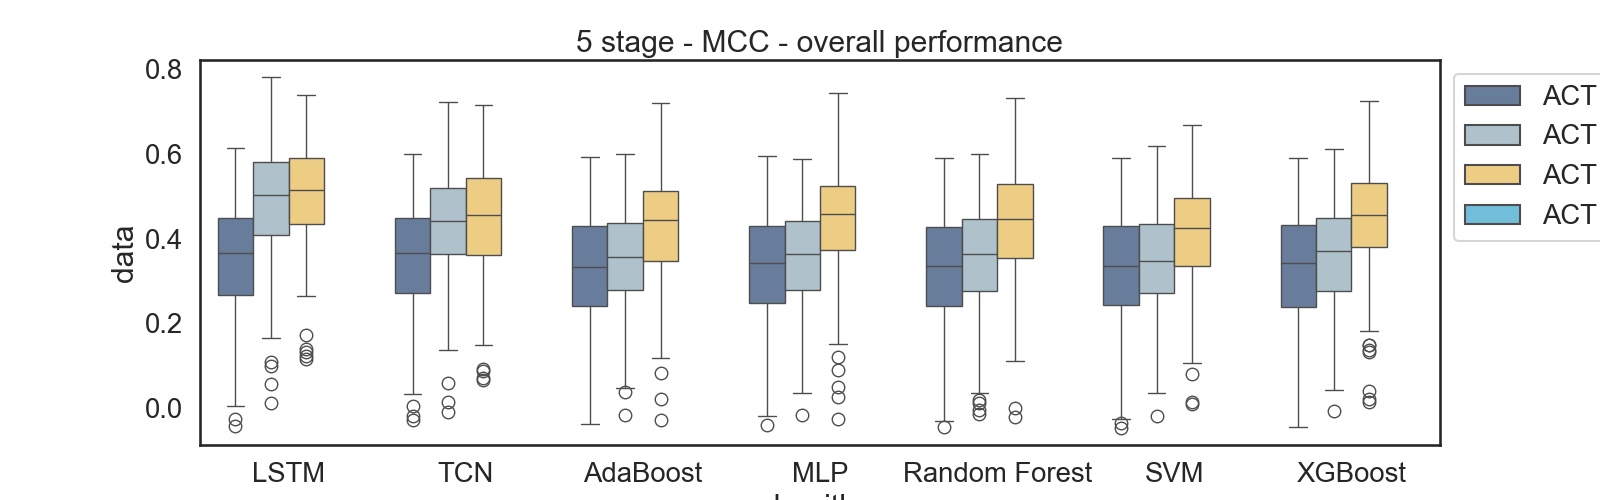

In [9]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(
    data=multi_xs(
        df_5_plot, ["MLP", "AdaBoost", "SVM", "Random Forest", "XGBoost", "LSTM", "TCN"], level="algorithm"
    ).reset_index(),
    x="algorithm",
    y="data",
    hue="modality",
    hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + ED-RRV"],
    ax=ax,
)
ax.legend(bbox_to_anchor=(1, 1))

plt.title("5 stage - MCC - overall performance")

# 3 stage

In [10]:
df_3 = multi_xs(df, ["3stage"], level="stage")
df_3 = multi_xs(df_3, ["accuracy", "f1", "mcc"], level="metric")[["data"]].astype(float)

In [11]:
df_3_mean = df_3.groupby(level=["algorithm type", "algorithm", "modality", "stage", "metric"]).agg(["median"])
df_3_mean.unstack("modality")["data"]["median"][["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + EDR"]]

modality                                            ACT  ACT + HRV  \
algorithm type algorithm     stage  metric                           
DL             LSTM          3stage accuracy  71.457185  77.675422   
                                    f1        65.284473  75.536814   
                                    mcc        0.473652   0.604352   
               TCN           3stage accuracy  59.238214  75.625854   
                                    f1        53.109295  73.309472   
                                    mcc        0.191348   0.553272   
ML             AdaBoost      3stage accuracy  69.954453  70.562500   
                                    f1        64.139721  65.212670   
                                    mcc        0.437152   0.451118   
               MLP           3stage accuracy  70.142570  70.897074   
                                    f1        64.152491  65.842832   
                                    mcc        0.443776   0.464673   
               Random Forest 3stage accuracy  70.078590  71.194113   
                                    f1        64.064586  65.871976   
                                    mcc        0.443001   0.462445   
               SVM           3stage accuracy  69.806643  70.174069   
                                    f1        63.886317  64.544966   
                                    mcc        0.442854   0.441779   
               XGBoost       3stage accuracy  70.333510  70.965181   
                                    f1        64.379926  66.316456   
                                    mcc        0.446375   0.459769   

modality                                      ACT + HRV + RRV  ACT + HRV + EDR  
algorithm type algorithm     stage  metric                                      
DL             LSTM          3stage accuracy        79.003374        77.498539  
                                    f1              77.724442        75.644245  
                                    mcc              0.621507         0.592670  
               TCN           3stage accuracy        73.059424        71.398646  
                                    f1              70.637326        67.436913  
                                    mcc              0.509086         0.479606  
ML             AdaBoost      3stage accuracy        74.083408        71.018352  
                                    f1              72.265069        66.246018  
                                    mcc              0.530805         0.464627  
               MLP           3stage accuracy        75.634624        71.665856  
                                    f1              73.862864        67.259580  
                                    mcc              0.554229         0.468250  
               Random Forest 3stage accuracy        74.520253        71.554356  
                                    f1              72.605695        66.824749  
                                    mcc              0.547375         0.472687  
               SVM           3stage accuracy        72.661878        70.812881  
                                    f1              68.642830        65.375223  
                                    mcc              0.496822         0.455821  
               XGBoost       3stage accuracy        75.521170        72.109023  
                                    f1              74.110390        67.719014  
                                    mcc              0.562603         0.479382

In [12]:
df_3_plot = multi_xs(df_3, ["mcc"], level="metric")

Text(0.5, 1.0, '3 stage - MCC - overall performance')

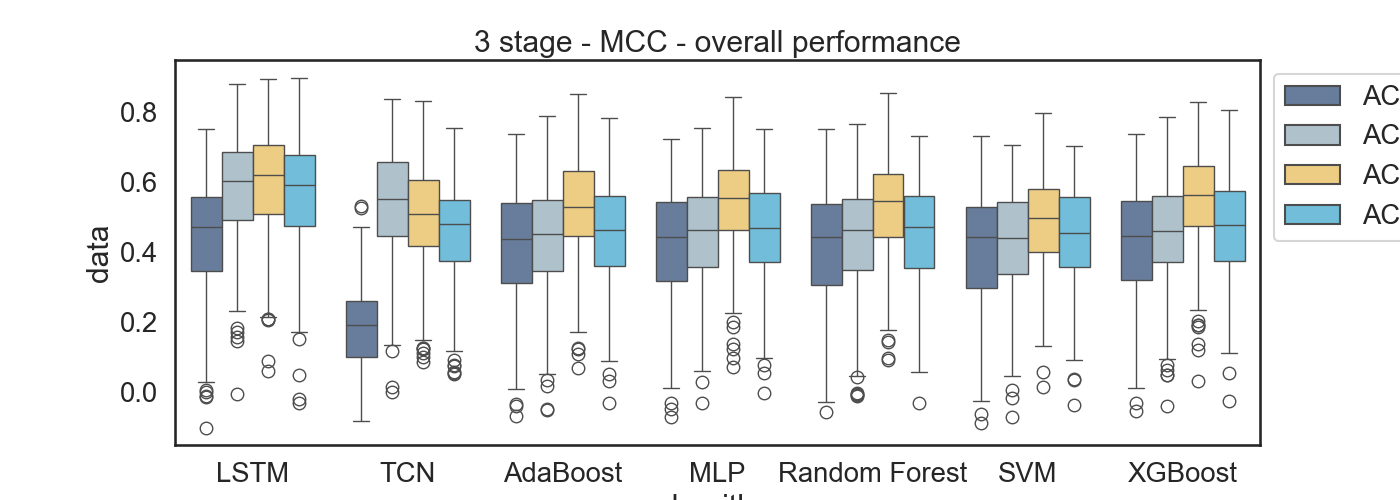

In [13]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(
    data=multi_xs(
        df_3_plot, ["MLP", "AdaBoost", "SVM", "Random Forest", "XGBoost", "LSTM", "TCN"], level="algorithm"
    ).reset_index(),
    x="algorithm",
    y="data",
    hue="modality",
    hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + EDR"],
    ax=ax,
)
ax.legend(bbox_to_anchor=(1, 1))

plt.title("3 stage - MCC - overall performance")

# Binary

In [14]:
df_2 = multi_xs(df, ["Binary"], level="stage")
df_2 = multi_xs(df_2, ["accuracy", "f1", "mcc"], level="metric")[["data"]].astype(float)

In [15]:
df_2_mean = df_2.groupby(level=["algorithm type", "algorithm", "modality", "stage", "metric"]).agg(["median"])
df_2_mean.unstack("modality")["data"]["median"][["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + EDR"]]

modality                                            ACT  ACT + HRV  \
algorithm type algorithm     stage  metric                           
DL             LSTM          Binary accuracy  85.141069  87.258594   
                                    f1        89.205892  91.208138   
                                    mcc        0.619473   0.684663   
               TCN           Binary accuracy  84.903549  84.929690   
                                    f1        89.498367  89.602004   
                                    mcc        0.617048   0.614233   
ML             AdaBoost      Binary accuracy  83.911382  84.329956   
                                    f1        89.235038  89.170945   
                                    mcc        0.573783   0.596989   
               MLP           Binary accuracy  84.118287  83.999239   
                                    f1        89.239570  89.357971   
                                    mcc        0.589402   0.598155   
               Random Forest Binary accuracy  84.435409  84.925774   
                                    f1        89.004030  89.537514   
                                    mcc        0.586833   0.597006   
               SVM           Binary accuracy  83.146113  84.033796   
                                    f1        88.807888  89.169020   
                                    mcc        0.565096   0.583019   
               XGBoost       Binary accuracy  84.178803  84.722808   
                                    f1        89.138298  89.226052   
                                    mcc        0.584955   0.609675   

modality                                      ACT + HRV + RRV  ACT + HRV + EDR  
algorithm type algorithm     stage  metric                                      
DL             LSTM          Binary accuracy        87.910198        86.465351  
                                    f1              91.033773        90.050431  
                                    mcc              0.706691         0.673484  
               TCN           Binary accuracy        86.291092        85.342591  
                                    f1              90.099719        89.865933  
                                    mcc              0.655359         0.631130  
ML             AdaBoost      Binary accuracy        85.883025        84.250980  
                                    f1              90.060434        89.160259  
                                    mcc              0.631820         0.598359  
               MLP           Binary accuracy        86.078570        84.857910  
                                    f1              90.127336        89.142183  
                                    mcc              0.657423         0.619557  
               Random Forest Binary accuracy        86.004783        85.135207  
                                    f1              90.138829        89.398710  
                                    mcc              0.639019         0.611313  
               SVM           Binary accuracy        85.125855        84.186183  
                                    f1              89.949821        89.192722  
                                    mcc              0.620060         0.596593  
               XGBoost       Binary accuracy        86.378626        84.678963  
                                    f1              90.364220        89.208286  
                                    mcc              0.657370         0.611090

In [16]:
df_2_plot = multi_xs(df_2, ["mcc"], level="metric")

Text(0.5, 1.0, 'Binary_ stage - MCC - overall performance')

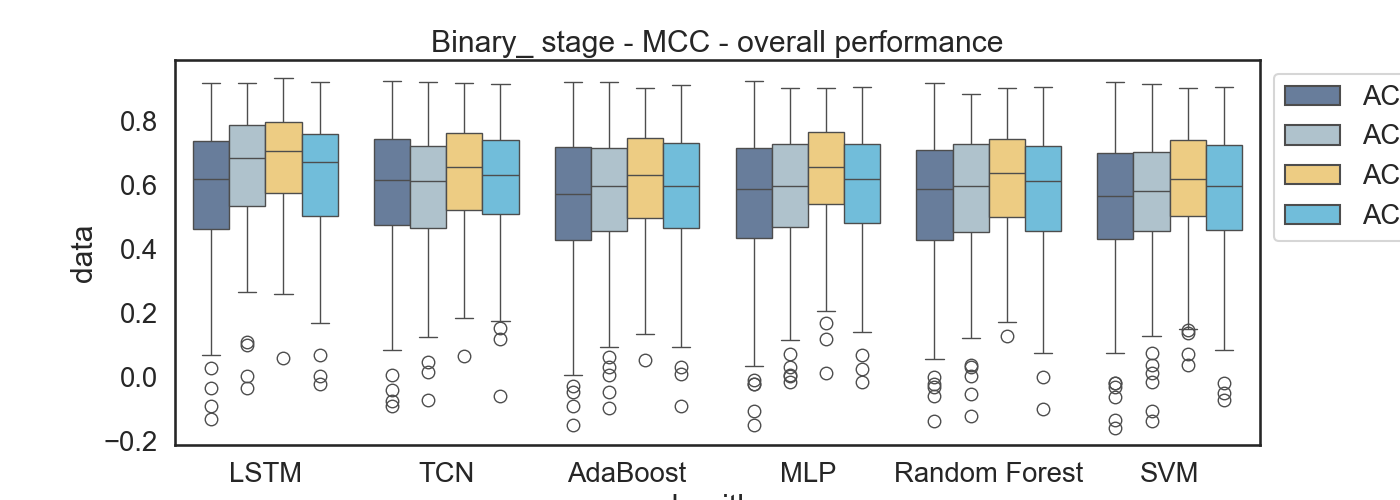

In [17]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(
    data=multi_xs(
        df_2_plot, ["MLP", "AdaBoost", "SVM", "Random Forest", "LSTM", "TCN"], level="algorithm"
    ).reset_index(),
    x="algorithm",
    y="data",
    hue="modality",
    hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + EDR"],
    ax=ax,
)
ax.legend(bbox_to_anchor=(1, 1))

plt.title("Binary_ stage - MCC - overall performance")

# Poster plots

Text(0.5, 1.0, '5 stage - MCC - overall performance')

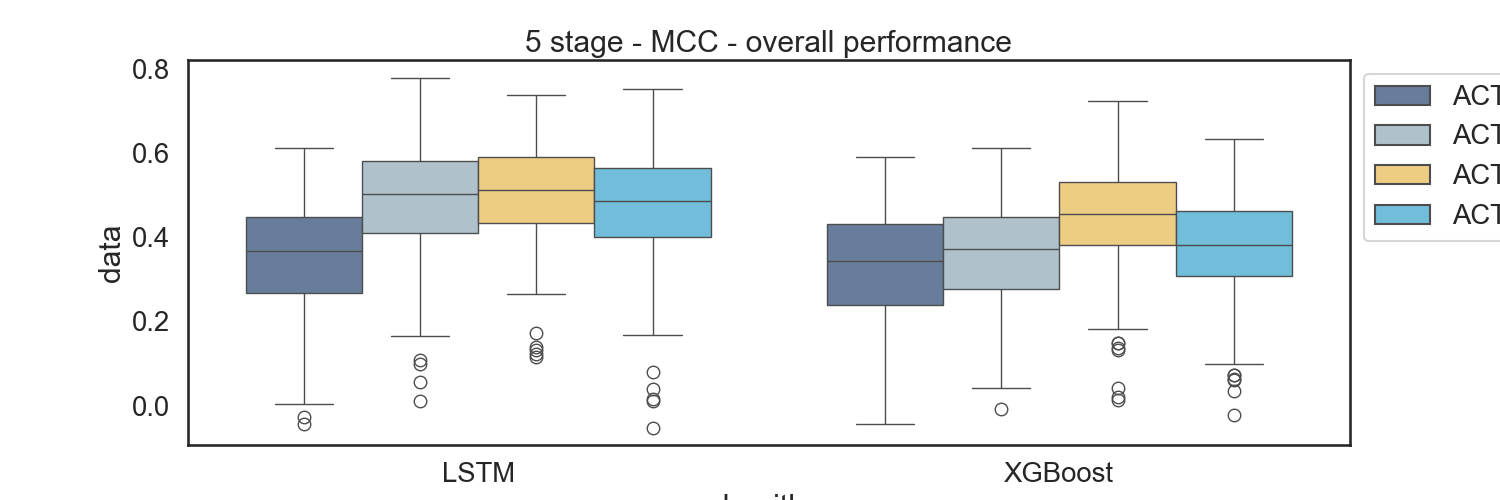

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(
    data=multi_xs(df_5_plot, ["XGBoost", "LSTM"], level="algorithm").reset_index(),
    x="algorithm",
    y="data",
    hue="modality",
    hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + EDR"],
    ax=ax,
)
ax.legend(bbox_to_anchor=(1, 1))

plt.title("5 stage - MCC - overall performance")

# Plot bestperforming ML + DL

# 5stage

In [19]:
algorithm = ["LSTM", "XGBoost"]
stage = "5stage"

In [20]:
df_plot = multi_xs(df, [stage], level="stage")
df_plot = df_plot.rename(index={"ACT + HRV + EDR": "ACT + HRV + ED-RRV"})

In [21]:
import biopsykit as bp
from biopsykit.stats import StatsPipeline

df_plot = multi_xs(df_plot, ["accuracy", "mcc", "f1"], level="metric")

In [22]:
df_plot = multi_xs(df_plot, algorithm, level="algorithm")
df_plot

data  \
algorithm type algorithm modality        stage  subject metric                
DL             LSTM      ACT             5stage 0027    accuracy  64.510490   
                                                        f1        53.142153   
                                                        mcc        0.372044   
                                                0077    accuracy  68.455134   
                                                        f1        58.629031   
...                                                                     ...   
ML             XGBoost   ACT + HRV + RRV 5stage 6784    f1        56.047290   
                                                        mcc        0.391784   
                                                6807    accuracy  41.578441   
                                                        f1        34.206925   
                                                        mcc        0.286856   

                                                                           race  \
algorithm type algorithm modality        stage  subject metric                    
DL             LSTM      ACT             5stage 0027    accuracy          White   
                                                        f1                White   
                                                        mcc               White   
                                                0077    accuracy       Hispanic   
                                                        f1             Hispanic   
...                                                                         ...   
ML             XGBoost   ACT + HRV + RRV 5stage 6784    f1        Afro-american   
                                                        mcc       Afro-american   
                                                6807    accuracy       Hispanic   
                                                        f1             Hispanic   
                                                        mcc            Hispanic   

                                                                  gender  \
algorithm type algorithm modality        stage  subject metric             
DL             LSTM      ACT             5stage 0027    accuracy  female   
                                                        f1        female   
                                                        mcc       female   
                                                0077    accuracy    male   
                                                        f1          male   
...                                                                  ...   
ML             XGBoost   ACT + HRV + RRV 5stage 6784    f1        female   
                                                        mcc       female   
                                                6807    accuracy    male   
                                                        f1          male   
                                                        mcc         male   

                                                                  PSG_quality  \
algorithm type algorithm modality        stage  subject metric                  
DL             LSTM      ACT             5stage 0027    accuracy          6.0   
                                                        f1                6.0   
                                                        mcc               6.0   
                                                0077    accuracy          7.0   
                                                        f1                7.0   
...                                                                       ...   
ML             XGBoost   ACT + HRV + RRV 5stage 6784    f1                7.0   
                                                        mcc               7.0   
                                                6807    accuracy          7.0   
                                                        f1                7.0   
  

In [23]:
dict_stats = {}

for metric in ["accuracy", "mcc", "f1"]:
    steps = [
        # ("prep", "normality"),
        # ("test", "pairwise_ttests")
        ("test", "kruskal"),
        ("posthoc", "pairwise_tests"),
    ]

    params = {
        "dv": "data",
        "between": "modality",
        # "subject": "subject",
        "groupby": ["algorithm"],
        "parametric": False,
        # "multicomp": {"levels": ["algorithm"]},
    }

    df_slice = df_plot.xs(metric, level="metric")
    pipeline = StatsPipeline(steps, params, round=4)
    pipeline.apply(df_slice)

    dict_stats[metric] = pipeline

dict_stats

{'accuracy': <biopsykit.stats.stats.StatsPipeline at 0x17f79d120>,
 'mcc': <biopsykit.stats.stats.StatsPipeline at 0x17f90e8c0>,
 'f1': <biopsykit.stats.stats.StatsPipeline at 0x17f451db0>}

In [24]:
dict_brackets = {
    key: dict_stats[key].sig_brackets(
        "posthoc", stats_type="between", plot_type="multi", x="algorithm", stats_effect_type="between"
    )
    for key in ["accuracy", "mcc", "f1"]
}

In [25]:
box_pairs = {key: val[0] for key, val in dict_brackets.items()}
pvalues = {key: val[1] for key, val in dict_brackets.items()}

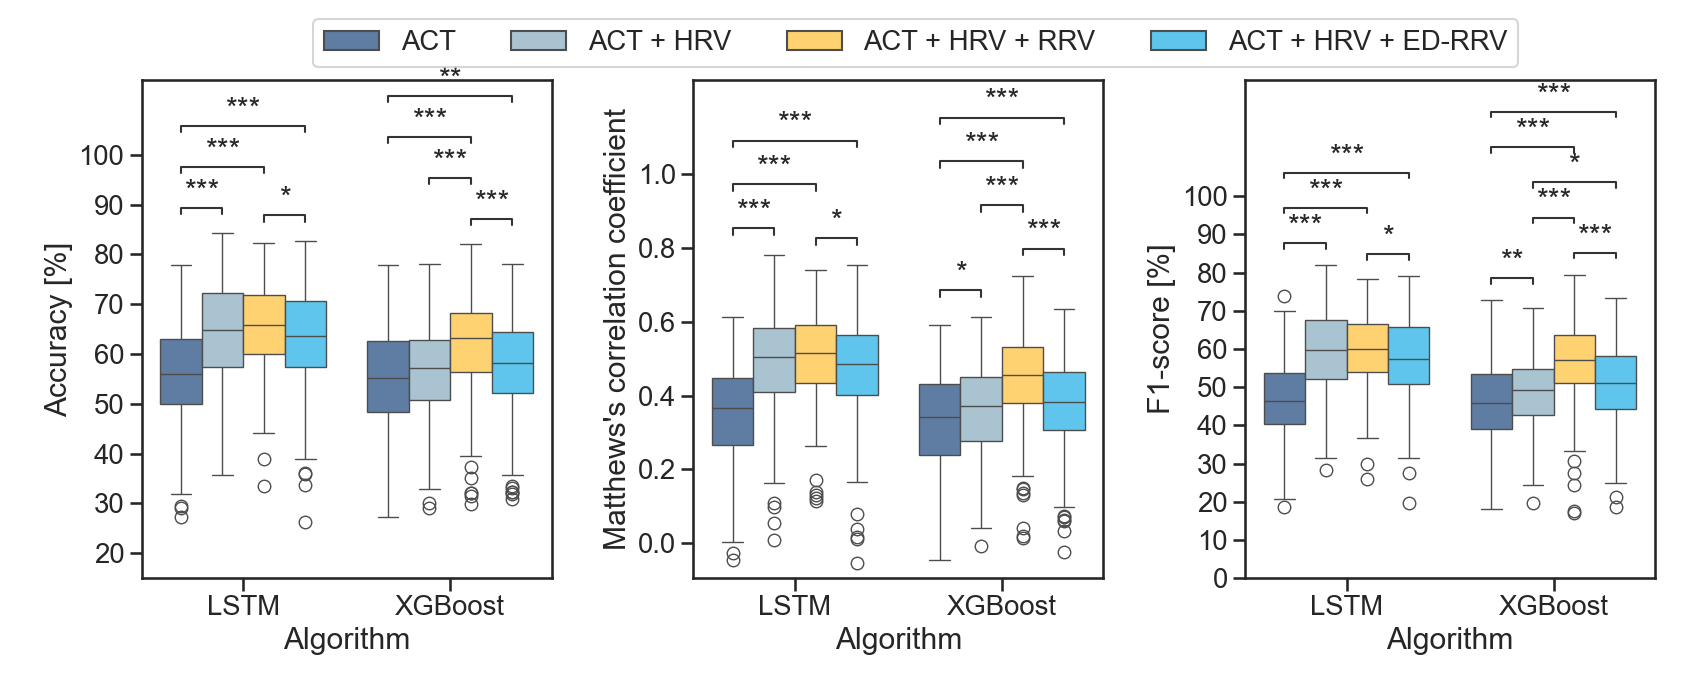

In [28]:
fig, axs = plt.subplots(figsize=(17, 7), ncols=3)

features = ["accuracy", "mcc", "f1"]


fig, axs = bp.plotting.multi_feature_boxplot(
    data=df_plot,
    x="algorithm",
    y="data",
    hue="modality",
    hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + ED-RRV"],
    group="metric",
    features=features,
    stats_kwargs={
        "box_pairs": box_pairs,
        "pvalues": pvalues,
        "fontsize": "medium",
        "text_offset": -6,
        "verbose": False,
    },
    ylabels={"accuracy": "Accuracy [%]", "mcc": "Matthews's correlation coefficient", "f1": "F1-score [%]"},
    axs=axs,
)
fig.tight_layout(rect=(0, 0, 1, 0.95), pad=1.5)
handles, labels = axs[0].get_legend_handles_labels()

for ax, metric in zip(axs, features):
    ax.legend().remove()
    ax.set_xlabel("Algorithm")
    ax.tick_params(reset=True, right=False, top=False)


# fig.legends[0].set_title("Input Modality")
fig.legends[0].remove()
plt.legend(ncol=4, bbox_to_anchor=(0.7, 1.15))

axs[0].set_yticks([i for i in np.arange(20, 110, 10)])
axs[1].set_yticks([i for i in np.arange(0, 1.1, 0.2)])
axs[2].set_yticks([i for i in np.arange(0, 110, 10)])

axs[0].set_ylim(15, 115)

plt.savefig(
    Path.cwd().joinpath("best_performing_" + stage + "_.pdf"),
    format="pdf",
    bbox_inches="tight",
)

# 3 stage

In [29]:
algorithm = ["LSTM", "XGBoost"]
stage = "3stage"

In [30]:
df_plot = multi_xs(df, [stage], level="stage")
df_plot = df_plot.rename(index={"ACT + HRV + EDR": "ACT + HRV + ED-RRV"})

In [31]:
import biopsykit as bp
from biopsykit.stats import StatsPipeline

df_plot = multi_xs(df_plot, ["accuracy", "mcc", "f1"], level="metric")

In [32]:
df_plot = multi_xs(df_plot, algorithm, level="algorithm")

In [33]:
dict_stats = {}

for metric in ["accuracy", "mcc", "f1"]:
    steps = [
        # ("prep", "normality"),
        # ("test", "pairwise_ttests")
        ("test", "kruskal"),
        ("posthoc", "pairwise_tests"),
    ]

    params = {
        "dv": "data",
        "between": "modality",
        # "subject": "subject",
        "groupby": ["algorithm"],
        "parametric": False,
        # "multicomp": {"levels": ["algorithm"]},
    }

    df_slice = df_plot.xs(metric, level="metric")
    pipeline = StatsPipeline(steps, params, round=4)
    pipeline.apply(df_slice)

    dict_stats[metric] = pipeline

dict_stats

{'accuracy': <biopsykit.stats.stats.StatsPipeline at 0x17f79e710>,
 'mcc': <biopsykit.stats.stats.StatsPipeline at 0x17f83ba00>,
 'f1': <biopsykit.stats.stats.StatsPipeline at 0x17f9f0310>}

In [34]:
dict_brackets = {
    key: dict_stats[key].sig_brackets(
        "posthoc", stats_type="between", plot_type="multi", x="algorithm", stats_effect_type="between"
    )
    for key in ["accuracy", "mcc", "f1"]
}

In [35]:
box_pairs = {key: val[0] for key, val in dict_brackets.items()}
pvalues = {key: val[1] for key, val in dict_brackets.items()}

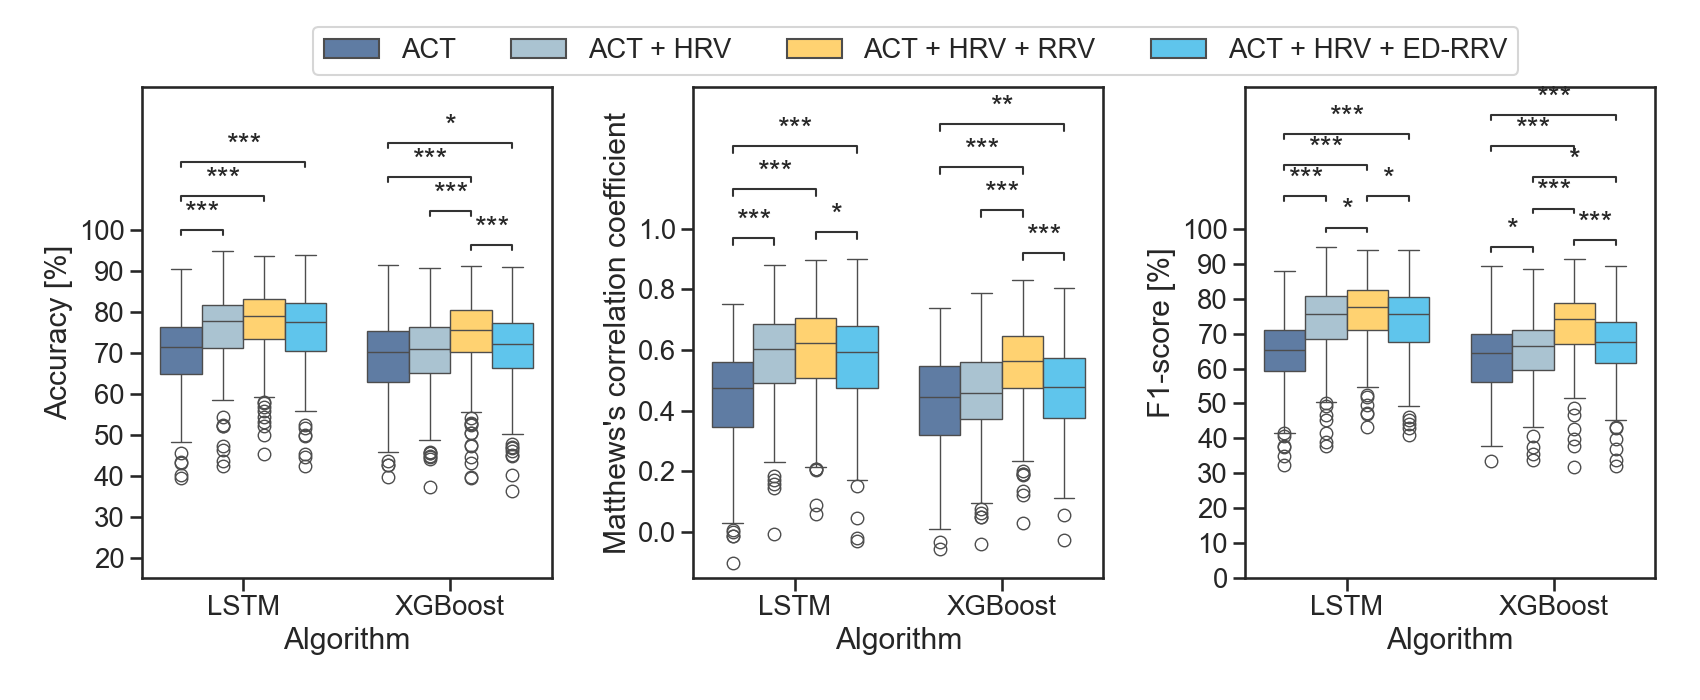

In [36]:
fig, axs = plt.subplots(figsize=(17, 7), ncols=3)

features = ["accuracy", "mcc", "f1"]


fig, axs = bp.plotting.multi_feature_boxplot(
    data=df_plot,
    x="algorithm",
    y="data",
    hue="modality",
    hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + ED-RRV"],
    group="metric",
    features=features,
    stats_kwargs={
        "box_pairs": box_pairs,
        "pvalues": pvalues,
        "fontsize": "medium",
        "text_offset": -6,
        "verbose": False,
    },
    ylabels={"accuracy": "Accuracy [%]", "mcc": "Matthews's correlation coefficient", "f1": "F1-score [%]"},
    axs=axs,
)
fig.tight_layout(rect=(0, 0, 1, 0.95), pad=1.5)
handles, labels = axs[0].get_legend_handles_labels()

for ax, metric in zip(axs, features):
    ax.legend().remove()
    ax.set_xlabel("Algorithm")
    ax.tick_params(reset=True, right=False, top=False)


# fig.legends[0].set_title("Input Modality")
fig.legends[0].remove()
plt.legend(ncol=4, bbox_to_anchor=(0.7, 1.15))

axs[0].set_yticks([i for i in np.arange(20, 110, 10)])
axs[1].set_yticks([i for i in np.arange(0, 1.1, 0.2)])
axs[2].set_yticks([i for i in np.arange(0, 110, 10)])

axs[0].set_ylim(15, 135)

plt.savefig(
    Path.cwd().joinpath("best_performing_" + stage + "_.pdf"),
    format="pdf",
    bbox_inches="tight",
)

# Binary

In [37]:
algorithm = ["LSTM", "XGBoost"]
stage = "Binary"

In [38]:
df_plot = multi_xs(df, [stage], level="stage")
df_plot = df_plot.rename(index={"ACT + HRV + EDR": "ACT + HRV + ED-RRV"})

In [39]:
import biopsykit as bp
from biopsykit.stats import StatsPipeline

df_plot = multi_xs(df_plot, ["accuracy", "mcc", "f1"], level="metric")

In [40]:
df_plot = multi_xs(df_plot, algorithm, level="algorithm")

In [41]:
dict_stats = {}

for metric in ["accuracy", "mcc", "f1"]:
    steps = [
        # ("prep", "normality"),
        # ("test", "pairwise_ttests")
        ("test", "kruskal"),
        ("posthoc", "pairwise_tests"),
    ]

    params = {
        "dv": "data",
        "between": "modality",
        # "subject": "subject",
        "groupby": ["algorithm"],
        "parametric": False,
        # "multicomp": {"levels": ["algorithm"]},
    }

    df_slice = df_plot.xs(metric, level="metric")
    pipeline = StatsPipeline(steps, params, round=4)
    pipeline.apply(df_slice)

    dict_stats[metric] = pipeline

dict_stats

{'accuracy': <biopsykit.stats.stats.StatsPipeline at 0x103b9e110>,
 'mcc': <biopsykit.stats.stats.StatsPipeline at 0x17fb54dc0>,
 'f1': <biopsykit.stats.stats.StatsPipeline at 0x14fed4640>}

In [42]:
dict_brackets = {
    key: dict_stats[key].sig_brackets(
        "posthoc", stats_type="between", plot_type="multi", x="algorithm", stats_effect_type="between"
    )
    for key in ["accuracy", "mcc", "f1"]
}

In [43]:
box_pairs = {key: val[0] for key, val in dict_brackets.items()}
pvalues = {key: val[1] for key, val in dict_brackets.items()}
display(box_pairs)
display(pvalues)

{'accuracy': [(('LSTM', 'ACT'), ('LSTM', 'ACT + HRV')),
  (('LSTM', 'ACT'), ('LSTM', 'ACT + HRV + RRV')),
  (('LSTM', 'ACT + HRV + ED-RRV'), ('LSTM', 'ACT + HRV + RRV')),
  (('XGBoost', 'ACT'), ('XGBoost', 'ACT + HRV + RRV')),
  (('XGBoost', 'ACT + HRV'), ('XGBoost', 'ACT + HRV + RRV'))],
 'mcc': [(('LSTM', 'ACT'), ('LSTM', 'ACT + HRV')),
  (('LSTM', 'ACT'), ('LSTM', 'ACT + HRV + ED-RRV')),
  (('LSTM', 'ACT'), ('LSTM', 'ACT + HRV + RRV')),
  (('LSTM', 'ACT + HRV + ED-RRV'), ('LSTM', 'ACT + HRV + RRV')),
  (('XGBoost', 'ACT'), ('XGBoost', 'ACT + HRV + RRV')),
  (('XGBoost', 'ACT + HRV'), ('XGBoost', 'ACT + HRV + RRV')),
  (('XGBoost', 'ACT + HRV + ED-RRV'), ('XGBoost', 'ACT + HRV + RRV'))],
 'f1': [(('LSTM', 'ACT'), ('LSTM', 'ACT + HRV')),
  (('LSTM', 'ACT'), ('LSTM', 'ACT + HRV + RRV')),
  (('LSTM', 'ACT + HRV + ED-RRV'), ('LSTM', 'ACT + HRV + RRV')),
  (('XGBoost', 'ACT'), ('XGBoost', 'ACT + HRV + RRV'))]}

{'accuracy': [0.0030637283890943123,
  0.00012600317836458194,
  0.019086479196250897,
  0.0015359126114893105,
  0.02101518718355363],
 'mcc': [0.0003769550654035679,
  0.03347424782691036,
  6.0313546299169335e-06,
  0.012114977805592777,
  5.688912210641552e-05,
  0.004917558000977068,
  0.01882666026523782],
 'f1': [0.01013533078409431,
  0.0009228571912620068,
  0.04533332184848344,
  0.010942207982929065]}

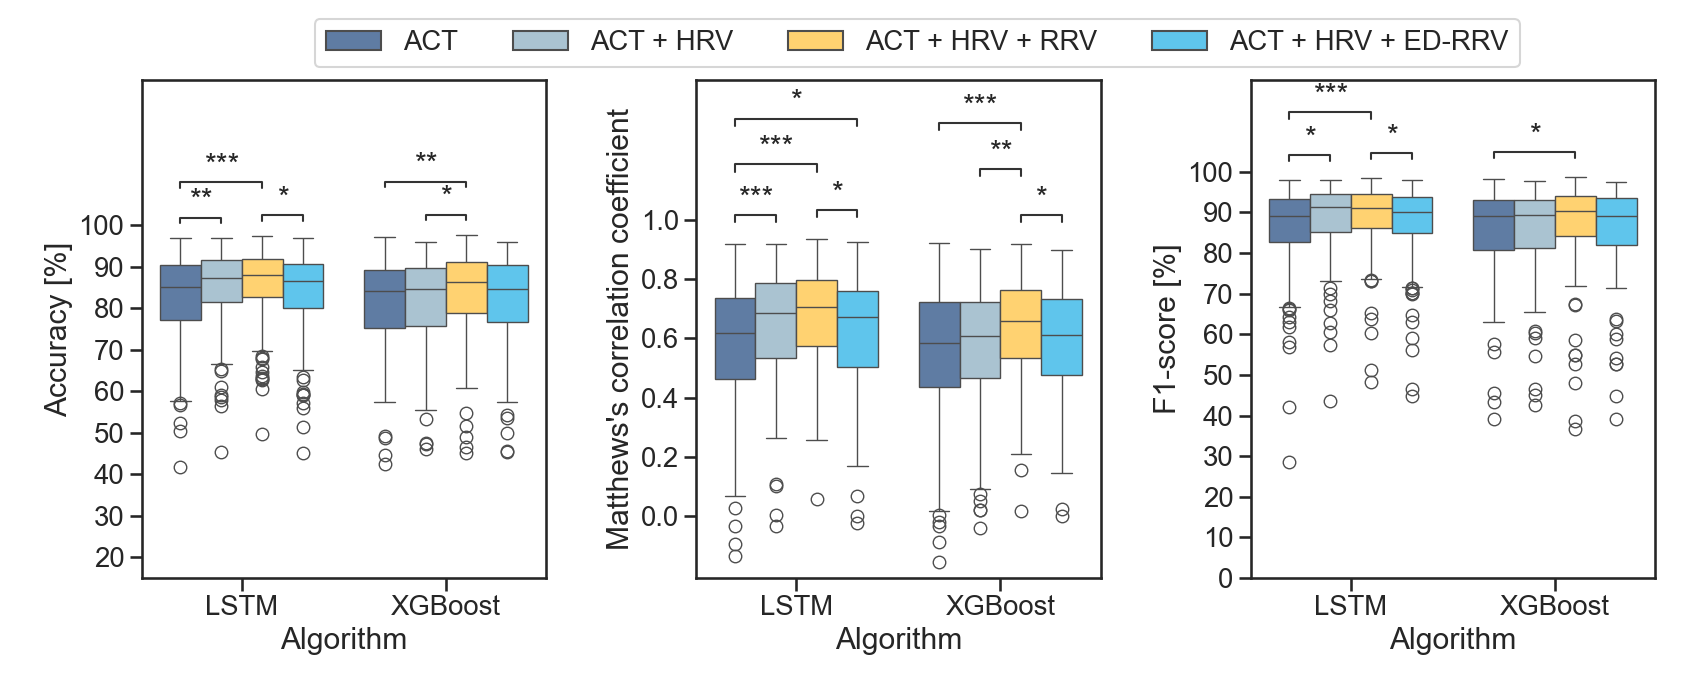

In [44]:
fig, axs = plt.subplots(figsize=(17, 7), ncols=3)

features = ["accuracy", "mcc", "f1"]


fig, axs = bp.plotting.multi_feature_boxplot(
    data=df_plot,
    x="algorithm",
    y="data",
    hue="modality",
    hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + ED-RRV"],
    group="metric",
    features=features,
    stats_kwargs={
        "box_pairs": box_pairs,
        "pvalues": pvalues,
        "fontsize": "medium",
        "text_offset": -6,
        "verbose": False,
    },
    ylabels={"accuracy": "Accuracy [%]", "mcc": "Matthews's correlation coefficient", "f1": "F1-score [%]"},
    axs=axs,
)
fig.tight_layout(rect=(0, 0, 1, 0.95), pad=1.5)
handles, labels = axs[0].get_legend_handles_labels()

for ax, metric in zip(axs, features):
    ax.legend().remove()
    ax.set_xlabel("Algorithm")
    ax.tick_params(reset=True, right=False, top=False)


# fig.legends[0].set_title("Input Modality")
fig.legends[0].remove()
plt.legend(ncol=4, bbox_to_anchor=(0.7, 1.15))

axs[0].set_yticks([i for i in np.arange(20, 110, 10)])
axs[1].set_yticks([i for i in np.arange(0, 1.1, 0.2)])
axs[2].set_yticks([i for i in np.arange(0, 110, 10)])

axs[0].set_ylim(15, 135)

plt.savefig(
    Path.cwd().joinpath("best_performing_" + stage + "_.pdf"),
    format="pdf",
    bbox_inches="tight",
)